# Overview

SNT is a alpha-shape based library to normalize stellar spectra, with a minimalistic interface that accepts data in multiple formats


## From numpy arrays

If we have already opened a fits file and we want to normalize the spectra, we can do the following:


2025-01-09 21:03:42.697 | DEBUG    | SNT.snt:normalize_spectra:48 - Running...
2025-01-09 21:03:48.113 | INFO     | SNT.snt:normalize_spectra:78 - Data storage folder set to SNT_data
2025-01-09 21:03:48.114 | INFO     | SNT.snt:normalize_spectra:79 - Saving text files


Text(0, 0.5, 'Flux')

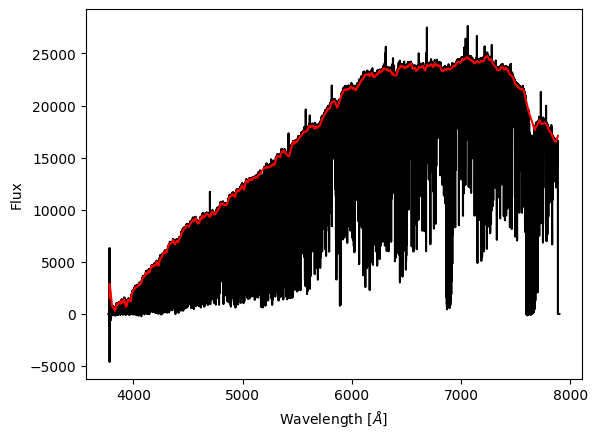

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
from astropy.io import fits

from SNT import normalize_spectra

output_path = "."
fname = "sample.fits"
inputfile = Path("../../resources/") / fname

with fits.open(inputfile) as hdu:
    full_data = hdu[1].data
    header = hdu[0].header

wavelengths = full_data["wavelength"]
spectra = full_data["flux"]
uncertainties = full_data["error"]

continuum = normalize_spectra(
    wavelengths=wavelengths,
    spectra=spectra,
    header=header,
    output_path=output_path,
    user_config={"parallel_orders": False, "Ncores": 1, "run_plot_generation": False},
    fname=fname
)

plt.plot(wavelengths, spectra, color = "black")
plt.plot(wavelengths, continuum[0], color="red")
plt.xlabel(r"Wavelength $[\AA]$")
plt.ylabel("Flux")

## From s-BART objects

SNT also comes, by default, with a routine to normalize the stellar spectra from s-BART Instrument data. By combining the two libraries, SNT is thus capable of accepting data from ESPRESSO, HARPS and (soon) HARPS-N.

In [ ]:

from SNT import normalize_sBART_object
from SBART.Instruments import ESPRESSO

frame = ESPRESSO("...")

normalize_sBART_object(frame, 
    output_path=output_path,
    user_config={"parallel_orders": False, "Ncores": 1, "run_plot_generation": False},
    )
